# Import Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# Obtain Data

Read features data csv into pandas

In [160]:
df = pd.read_csv('Excel/data.csv')
df.head()

,Unnamed: 0,Brand,Model,Year,Overall Score,Road Test Score,Reliability Score,Owner Satisfact Score,Warranty,Drivetrain Warranty,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,0,tesla,model-s,2013,NaN,NaN,3,5,NaN,NaN,...,57,117,41,4695,920,NaN,98.0,84.0,68.0,10.0
1,0,ford,fiesta,2013,NaN,NaN,N,1,NaN,NaN,...,58,98,36,2665,825,NaN,NaN,NaN,NaN,NaN
2,0,chrysler,town-country,2014,NaN,NaN,2,3,NaN,NaN,...,68,121,42,4685,1150,3600.0,65.0,53.0,61.0,56.0
3,0,honda,passport,2019,NaN,NaN,1,4,NaN,NaN,...,72,111,40,4170,950,5000.0,79.0,81.0,60.0,78.0
4,0,subaru,ascent,2019,NaN,NaN,3,4,NaN,NaN,...,72,114,40,4550,1160,5000.0,84.0,85.0,73.0,83.0


Filter features df to only include models from 2018

In [161]:
df = df[df['Year'] == 2018]
df.reset_index(inplace=True, drop=True)
df.head()

,Unnamed: 0,Brand,Model,Year,Overall Score,Road Test Score,Reliability Score,Owner Satisfact Score,Warranty,Drivetrain Warranty,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,0,ford,flex,2018,NaN,NaN,5,4,NaN,NaN,...,68,118,43,4820,1160,4500.0,90.0,81.0,74.0,84.0
1,0,lexus,ls,2018,NaN,NaN,1,2,NaN,NaN,...,58,123,41,5170,870,NaN,68.0,79.0,46.0,84.0
2,0,jeep,compass,2018,NaN,NaN,1,1,NaN,NaN,...,65,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0
3,0,lexus,es,2018,NaN,NaN,5,4,NaN,NaN,...,57,111,40,3575,905,NaN,83.0,84.0,67.0,81.0
4,0,jeep,renegade,2018,NaN,NaN,1,1,NaN,NaN,...,66,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0


# Scrub Data

Perform df.info() to understand scrubbing needed

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 90 columns):
Unnamed: 0                   189 non-null int64
Brand                        189 non-null object
Model                        189 non-null object
Year                         189 non-null int64
Overall Score                0 non-null float64
Road Test Score              0 non-null float64
Reliability Score            189 non-null object
Owner Satisfact Score        189 non-null object
Warranty                     0 non-null object
Drivetrain Warranty          0 non-null object
Corrosion Waranty            0 non-null object
Roadside Aid                 0 non-null object
Free Maintenance             0 non-null object
Acceleration Score           189 non-null int64
Zero To Sixty                189 non-null float64
Transmission Score           189 non-null int64
Fuel Economy Score           189 non-null int64
Overall Fuel Economy         189 non-null float64
City Fuel Economy           

Drop df columns not used in modeling

In [46]:
df.drop(columns=['Unnamed: 0', 'Brand', 'Overall Score', 'Road Test Score', 'Model', 'Year', 'Warranty', 
                 'Drivetrain Warranty', 'Corrosion Waranty', 'Roadside Aid', 'Free Maintenance', 'Fuel Type', 
                  'Seats', 'Side Airbags', 'Head Airbags'], inplace=True)
df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,5,4,4,8.5,4,2,18.0,12.0,25.0,"1,620",...,68,118,43,4820,1160,4500.0,90.0,81.0,74.0,84.0
1,1,2,5,6.0,5,2,20.0,12.0,32.0,"1,710",...,58,123,41,5170,870,NaN,68.0,79.0,46.0,84.0
2,1,1,3,9.8,3,3,24.0,16.0,35.0,"1,190",...,65,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0
3,5,4,4,6.7,5,4,25.0,17.0,35.0,"1,155",...,57,111,40,3575,905,NaN,83.0,84.0,67.0,81.0
4,1,1,3,9.9,3,3,24.0,16.0,32.0,"1,225",...,66,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0


Update data types for all columns to int or float

In [47]:
df['Reliability Score'] = df['Reliability Score'].replace({'N': np.nan})
df['Reliability Score'] = df['Reliability Score'].astype('float')


df['Owner Satisfact Score'] = df['Owner Satisfact Score'].astype('float')

df['Headlights'] = df['Headlights'].astype('float')

df['Annual Fuel Cost'] = df['Annual Fuel Cost'].apply(lambda x: x.replace(',', ''))
fuel_replace_dict = {'A': np.nan}
df['Annual Fuel Cost'] = df['Annual Fuel Cost'].replace(fuel_replace_dict)
df['Annual Fuel Cost'] = df['Annual Fuel Cost'].astype('float')

seat_replace_dict = {'N': 0}
df['Rear Seat Score'] = df['Rear Seat Score'].replace(seat_replace_dict)
df['Rear Seat Score'] = df['Rear Seat Score'].astype('int')

df['Third Row Score'] = df['Third Row Score'].replace(seat_replace_dict)
df['Third Row Score'] = df['Third Row Score'].astype('int')

df['Rear Access'] = df['Rear Access'].replace(seat_replace_dict)
df['Rear Access'] = df['Rear Access'].astype('int')

df['Third Access'] = df['Third Access'].replace(seat_replace_dict)
df['Third Access'] = df['Third Access'].astype('int')

safety_cols = df.columns[44:57]
safety_replace_dict = {'Standard':1, 'Optional':0, 'Available':0, 'Not offered':0, 'Varies':0}
for col in safety_cols:
    df[col] = df[col].replace(safety_replace_dict)
    df[col] = df[col].astype('float')

crash_replace_dict = {'Poor': 1, 'Marginal':2, 'Acceptable':3, 'Good':4}
for col in df.columns[57:63]:
    df[col] = df[col].replace(crash_replace_dict)
    df[col] = df[col].astype('float')    
df.head()

df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,5.0,4.0,4,8.5,4,2,18.0,12.0,25.0,1620.0,...,68,118,43,4820,1160,4500.0,90.0,81.0,74.0,84.0
1,1.0,2.0,5,6.0,5,2,20.0,12.0,32.0,1710.0,...,58,123,41,5170,870,NaN,68.0,79.0,46.0,84.0
2,1.0,1.0,3,9.8,3,3,24.0,16.0,35.0,1190.0,...,65,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0
3,5.0,4.0,4,6.7,5,4,25.0,17.0,35.0,1155.0,...,57,111,40,3575,905,NaN,83.0,84.0,67.0,81.0
4,1.0,1.0,3,9.9,3,3,24.0,16.0,32.0,1225.0,...,66,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0


Manually replace missing values

In [48]:
df['Annual Fuel Cost'] = df['Annual Fuel Cost'].replace({np.nan: 200})

for col in df.columns[31:34]:
          df[col] = df[col].replace({np.nan: 0})
        
for col in df.columns[35:38]:
          df[col] = df[col].replace({np.nan: 0})
                       
df['Fuel Capacity'] = df['Fuel Capacity'].fillna(value=df['Fuel Capacity'].mean())   

for col in df.columns[44:57]:
          df[col] = df[col].replace({np.nan: 0})  
            
df.drop(columns=['IIHS Passenger Overlap'], inplace=True)
                                                            
df['Towing Capacity'] = df['Towing Capacity'].replace({np.nan: 0})



df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,5.0,4.0,4,8.5,4,2,18.0,12.0,25.0,1620.0,...,68,118,43,4820,1160,4500.0,90.0,81.0,74.0,84.0
1,1.0,2.0,5,6.0,5,2,20.0,12.0,32.0,1710.0,...,58,123,41,5170,870,0.0,68.0,79.0,46.0,84.0
2,1.0,1.0,3,9.8,3,3,24.0,16.0,35.0,1190.0,...,65,104,38,3525,860,2000.0,41.0,51.0,51.0,72.0
3,5.0,4.0,4,6.7,5,4,25.0,17.0,35.0,1155.0,...,57,111,40,3575,905,0.0,83.0,84.0,67.0,81.0
4,1.0,1.0,3,9.9,3,3,24.0,16.0,32.0,1225.0,...,66,101,37,3360,985,2000.0,49.0,41.0,46.0,67.0


Replace remaining missing values with iterative imputer

In [49]:
ii = IterativeImputer(random_state=7)
imputed_values = ii.fit_transform(df)
scrubbed_df = pd.DataFrame(imputed_values, columns=df.columns)
scrubbed_df.head()

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,5.0,4.0,4.0,8.5,4.0,2.0,18.0,12.0,25.0,1620.0,...,68.0,118.0,43.0,4820.0,1160.0,4500.0,90.0,81.0,74.0,84.0
1,1.0,2.0,5.0,6.0,5.0,2.0,20.0,12.0,32.0,1710.0,...,58.0,123.0,41.0,5170.0,870.0,0.0,68.0,79.0,46.0,84.0
2,1.0,1.0,3.0,9.8,3.0,3.0,24.0,16.0,35.0,1190.0,...,65.0,104.0,38.0,3525.0,860.0,2000.0,41.0,51.0,51.0,72.0
3,5.0,4.0,4.0,6.7,5.0,4.0,25.0,17.0,35.0,1155.0,...,57.0,111.0,40.0,3575.0,905.0,0.0,83.0,84.0,67.0,81.0
4,1.0,1.0,3.0,9.9,3.0,3.0,24.0,16.0,32.0,1225.0,...,66.0,101.0,37.0,3360.0,985.0,2000.0,49.0,41.0,46.0,67.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 74 columns):
Reliability Score            170 non-null float64
Owner Satisfact Score        189 non-null float64
Acceleration Score           189 non-null int64
Zero To Sixty                189 non-null float64
Transmission Score           189 non-null int64
Fuel Economy Score           189 non-null int64
Overall Fuel Economy         189 non-null float64
City Fuel Economy            189 non-null float64
Highway Fuel Economy         189 non-null float64
Annual Fuel Cost             189 non-null float64
Braking Score                189 non-null int64
Emergency Handling Score     189 non-null int64
Ride Score                   189 non-null int64
Noise Score                  189 non-null int64
Front Seat Score             189 non-null int64
Rear Seat Score              189 non-null int64
Interior Finish Score        189 non-null int64
Trunk Score                  189 non-null int64
Zero To Thirty   

Determine correlated features with vif greater than 5 and drop from scrubbed df

In [51]:
vif_df = add_constant(scrubbed_df)
drop_vif = 11
drop_features = []

while 1:
    vif_results = []
    for index, col in enumerate(vif_df.columns):
        vif_score = variance_inflation_factor(vif_df.values, index)
        vif_results.append([col, vif_score])
    vif_results_df = pd.DataFrame(vif_results, columns=['Feature', 'VIF Score']).sort_values(by='VIF Score', ascending=False)
    drop_feature = vif_results_df['Feature'].iloc[0]
    drop_vif = vif_results_df['VIF Score'].iloc[0]
    if drop_vif < 5:
        break
    vif_df.drop(columns=drop_feature, inplace=True)
    drop_features.append([drop_feature, drop_vif])

scrubbed_df.drop(columns=drop_features_df['Feature'].values, inplace=True)
    
drop_features_df = pd.DataFrame(drop_features, columns = ['Feature', 'VIF Score'])
drop_features_df

/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF Score
0,Overall Fuel Economy,1524.438019
1,Quarter Mile,641.384773
2,Zero To Sixty,83.624416
3,Highway Fuel Economy,76.479616
4,Length,35.918802
5,Annual Fuel Cost,33.889523
6,Curb Weight,28.469157
7,Third Leg Room,24.401381
8,Rear Leg Room,17.553610
9,Wheelbase,16.708412


In [52]:
scrubbed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 42 columns):
Reliability Score            189 non-null float64
Owner Satisfact Score        189 non-null float64
Acceleration Score           189 non-null float64
Transmission Score           189 non-null float64
City Fuel Economy            189 non-null float64
Braking Score                189 non-null float64
Ride Score                   189 non-null float64
Noise Score                  189 non-null float64
Front Seat Score             189 non-null float64
Rear Seat Score              189 non-null float64
Interior Finish Score        189 non-null float64
Trunk Score                  189 non-null float64
Routine Handling Score       189 non-null float64
Headlights                   189 non-null float64
Driving Position             189 non-null float64
Front Leg Room               189 non-null float64
Front Head Room              189 non-null float64
Rear Shoulder Room           189 non-null flo

Perform PCA to reduce number of features

In [58]:
pca = PCA()
components = pca.fit_transform(scrubbed_df)
component_columns = []
for num in range(1, len(scrubbed_df.columns)+1):
    component_columns.append(f'Principal Component {num}')
components_df = pd.DataFrame(components, columns=component_columns)
components_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 33,Principal Component 34,Principal Component 35,Principal Component 36,Principal Component 37,Principal Component 38,Principal Component 39,Principal Component 40,Principal Component 41,Principal Component 42
0,-36.442456,16.520184,-9.222999,15.279457,-7.846051,-0.361283,2.392986,-1.223642,-2.853638,2.674360,...,0.055603,-0.016329,-0.072487,-0.041529,0.008938,2.250541e-16,-1.904857e-15,7.802253e-16,1.359390e-15,6.943917e-17
1,0.648942,-13.908238,-1.220057,-17.599573,11.471051,3.145157,1.050924,3.232137,-0.593466,-2.116964,...,-0.412851,-0.022387,0.089853,-0.011247,-0.004913,1.472851e-15,-2.164131e-15,2.206660e-15,2.876545e-15,-8.147326e-17
2,4.523196,-12.242397,24.181764,-29.109698,0.031471,5.796462,3.744005,1.435962,1.561708,-1.788309,...,-0.046778,-0.042088,0.037575,-0.014472,0.018542,1.649822e-15,1.177886e-15,-1.725205e-15,1.916242e-15,5.102432e-16
3,6.854640,-8.828321,-6.379670,4.099650,0.080895,-1.077073,-1.912304,1.324530,-0.319777,1.270696,...,-0.066205,-0.099563,0.098249,-0.029372,0.056806,1.998666e-15,1.655678e-15,-1.623223e-15,-9.646761e-16,-2.865656e-16
4,4.715285,-11.206669,23.633031,-24.452678,8.682333,3.277622,0.970868,-3.831398,-1.293318,-0.839142,...,-0.031137,0.064086,0.033818,0.057308,-0.023429,1.461184e-15,-4.026895e-16,2.338215e-16,1.533203e-15,-2.140275e-16


Plot PCA explained variance ratio

Text(0, 0.5, 'Explained Variance proportion')

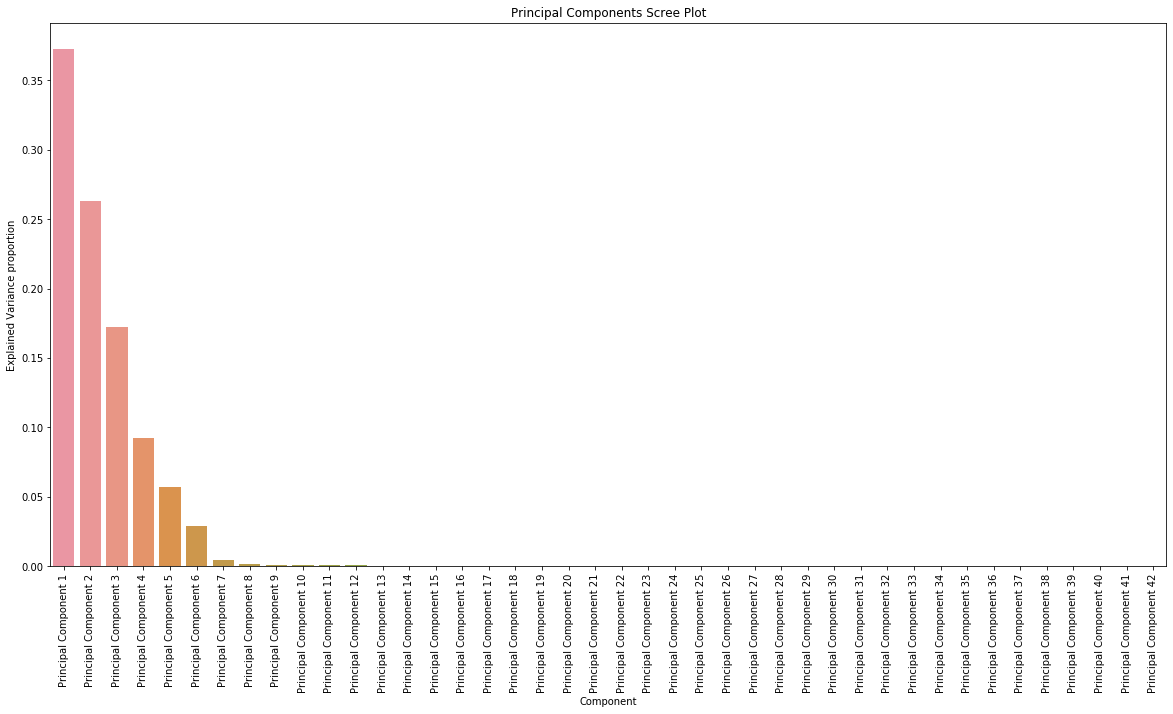

In [69]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(component_columns, pca.explained_variance_ratio_, ax=ax)
ax.set_title('Principal Components Scree Plot')
ax.set_xlabel('Component')
ax.set_xticklabels(component_columns, rotation=90)
ax.set_ylabel('Explained Variance proportion')

Include components explaining 99% of variance in model

In [100]:
total_explained_variance = 0
num_components = 0
while total_explained_variance < .99:
    total_explained_variance += pca.explained_variance_ratio_[num_components]
    num_components += 1

final_df = components_df.iloc[:,0:num_components]
final_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7
0,-36.442456,16.520184,-9.222999,15.279457,-7.846051,-0.361283,2.392986
1,0.648942,-13.908238,-1.220057,-17.599573,11.471051,3.145157,1.050924
2,4.523196,-12.242397,24.181764,-29.109698,0.031471,5.796462,3.744005
3,6.854640,-8.828321,-6.379670,4.099650,0.080895,-1.077073,-1.912304
4,4.715285,-11.206669,23.633031,-24.452678,8.682333,3.277622,0.970868


# Explore Data

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,5.000000,4.0,4.0,8.5,4.0,2.0,18.0,12.0,25.0,1620.0,...,68.0,118.0,43.0,4820.0,1160.0,4500.0,90.000000,81.000000,74.000000,84.000000
1,1.000000,2.0,5.0,6.0,5.0,2.0,20.0,12.0,32.0,1710.0,...,58.0,123.0,41.0,5170.0,870.0,0.0,68.000000,79.000000,46.000000,84.000000
2,1.000000,1.0,3.0,9.8,3.0,3.0,24.0,16.0,35.0,1190.0,...,65.0,104.0,38.0,3525.0,860.0,2000.0,41.000000,51.000000,51.000000,72.000000
3,5.000000,4.0,4.0,6.7,5.0,4.0,25.0,17.0,35.0,1155.0,...,57.0,111.0,40.0,3575.0,905.0,0.0,83.000000,84.000000,67.000000,81.000000
4,1.000000,1.0,3.0,9.9,3.0,3.0,24.0,16.0,32.0,1225.0,...,66.0,101.0,37.0,3360.0,985.0,2000.0,49.000000,41.000000,46.000000,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,3.000000,3.0,3.0,9.9,5.0,5.0,33.0,21.0,49.0,880.0,...,57.0,106.0,36.0,2865.0,850.0,0.0,62.000000,47.000000,85.000000,73.000000
185,3.479616,1.0,3.0,10.4,3.0,5.0,31.0,21.0,42.0,930.0,...,59.0,106.0,36.0,2865.0,860.0,0.0,63.874636,52.947722,72.452456,73.118647
186,5.000000,1.0,3.0,9.6,5.0,4.0,28.0,20.0,36.0,1030.0,...,61.0,101.0,36.0,2945.0,850.0,0.0,70.000000,44.000000,56.000000,85.000000
187,4.000000,3.0,4.0,7.5,5.0,2.0,20.0,13.0,28.0,1460.0,...,70.0,111.0,41.0,4280.0,1340.0,5000.0,71.000000,70.000000,59.000000,73.000000


In [79]:
scrubbed_df[['Reliability Score', 'Owner Satisfact Score']]

,Reliability Score,Owner Satisfact Score
0,5.000000,5.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,5.000000,5.000000
4,1.000000,1.000000
...,...,...
184,3.000000,3.000000
185,3.252941,3.252941
186,5.000000,5.000000
187,4.000000,4.000000


In [8]:
df[df.isna().sum(axis=1)>30]

,Reliability Score,Owner Satisfact Score,Acceleration Score,Zero To Sixty,Transmission Score,Fuel Economy Score,Overall Fuel Economy,City Fuel Economy,Highway Fuel Economy,Annual Fuel Cost,...,Height,Wheelbase,Turning Circle,Curb Weight,Max Load,Towing Capacity,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction


In [9]:
df.isna().sum(axis=1)

0       6
1      10
2       4
3       5
4       6
       ..
184     4
185    14
186     5
187     0
188     6
Length: 189, dtype: int64

In [20]:
test_df = pd.read_csv('Excel/data.csv')
test_df = test_df[test_df['Year']==2018]
test_df.reset_index(inplace=True, drop=True)

In [35]:
test_df['Annual Fuel Cost'].apply(lambda x: x.replace(',', '')).replace({'A':np.nan}).astype('float').describe()

count     184.000000
mean     1332.663043
std       343.849909
min       240.000000
25%      1113.750000
50%      1330.000000
75%      1560.000000
max      2210.000000
Name: Annual Fuel Cost, dtype: float64

In [49]:
test_df[test_df['Third Shoulder Room'].isna()==0][['Model','Third Shoulder Room','Third Leg Room','Third Head Room']]

,Model,Third Shoulder Room,Third Leg Room,Third Head Room
0,flex,50.0,28.0,2.0
10,tiguan,48.0,NaN,NaN
13,odyssey,59.0,29.5,4.0
27,rx-l,45.5,16.5,NaN
30,explorer,48.5,27.0,3.0
33,q7,50.0,26.5,1.0
37,highlander,53.0,21.0,1.5
40,sedona,59.0,27.5,2.0
42,tahoe,63.5,27.0,NaN
49,sorento,52.0,26.0,NaN


In [24]:
test_df['Fuel Capacity'].value_counts().iloc[0:10]

18.5    13
13.2    13
26.0     9
14.0     7
15.9     6
19.5     6
14.5     5
19.2     4
17.4     4
15.3     4
Name: Fuel Capacity, dtype: int64

In [12]:
scrubbed_df['IIHS Side Crash'].mean()

4.0